In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd /home/ecotner/neural_tsp/notebooks

/home/ecotner/neural_tsp/notebooks


In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from neuraltsp.environments import RandomTSPEnv

In [2]:
env = RandomTSPEnv(n_locs=[5,7,10])

In [24]:
env.reset();

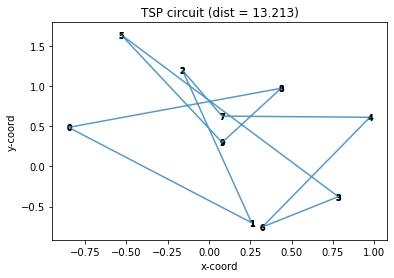

In [40]:
env.step(torch.randn(env.locs.shape[0]).argsort(), kind="re-order");
env.render(label_pts=True)
plt.show()